In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
torch.cuda.empty_cache()
print(torch.cuda.is_available())

True


In [3]:
path = untar_data(URLs.IMAGENETTE); path

WindowsPath('C:/Users/justi/.fastai/data/imagenette')

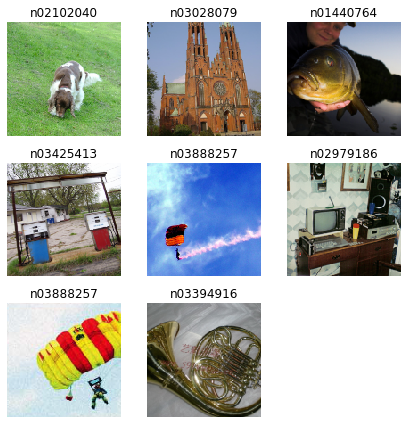

In [4]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, valid='val', ds_tfms=tfms, bs=8, size=128).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(6,6))

In [5]:
n=32
g=(1+5**.5)/2
m = -2.5
t = .15
a = 1.4
amin = (a-1) * t / -m
amax = amin + g**4
class mixedNet(nn.Module):
    def __init__(self):
        super(mixedNet, self).__init__()
        self.conv00 = nn.Conv2d(3, 1*n, 3, stride=1, bias=False)
        self.conv011 = nn.Conv2d(1*n, 1*n, 2, stride=1, bias=False)
        self.conv012 = nn.Conv2d(1*n, 1*n, 2, stride=1, bias=False)
        self.conv013 = nn.Conv2d(1*n, 1*n, 2, stride=1, bias=False)
        self.conv014 = nn.Conv2d(1*n, 1*n, 2, stride=1, bias=False)
        self.conv015 = nn.Conv2d(1*n, 1*n, 2, stride=1, bias=False)
        self.conv016 = nn.Conv2d(1*n, 1*n, 2, stride=1, bias=False)
        self.conv02 = nn.Conv2d(1*n, 2*n, 4, stride=2, bias=False)
        self.conv111 = nn.Conv2d(2*n, 2*n, 2, stride=1, bias=False)
        self.conv112 = nn.Conv2d(2*n, 2*n, 2, stride=1, bias=False)
        self.conv113 = nn.Conv2d(2*n, 2*n, 2, stride=1, bias=False)
        self.conv114 = nn.Conv2d(2*n, 2*n, 2, stride=1, bias=False)
        self.conv115 = nn.Conv2d(2*n, 2*n, 2, stride=1, bias=False)
        self.conv116 = nn.Conv2d(2*n, 2*n, 2, stride=1, bias=False)
        self.conv12 = nn.Conv2d(2*n, 4*n, 4, stride=2, bias=False)
        self.conv211 = nn.Conv2d(4*n, 4*n, 2, stride=1, bias=False)
        self.conv212 = nn.Conv2d(4*n, 4*n, 2, stride=1, bias=False)
        self.conv213 = nn.Conv2d(4*n, 4*n, 2, stride=1, bias=False)
        self.conv214 = nn.Conv2d(4*n, 4*n, 2, stride=1, bias=False)
        self.conv215 = nn.Conv2d(4*n, 4*n, 2, stride=1, bias=False)
        self.conv216 = nn.Conv2d(4*n, 4*n, 2, stride=1, bias=False)
        self.conv22 = nn.Conv2d(4*n, 7*n, 4, stride=2, bias=False)
        self.conv311 = nn.Conv2d(7*n, 7*n, 2, stride=1, bias=False)
        self.conv312 = nn.Conv2d(7*n, 7*n, 2, stride=1, bias=False)
        self.conv313 = nn.Conv2d(7*n, 7*n, 2, stride=1, bias=False)
        self.conv314 = nn.Conv2d(7*n, 7*n, 2, stride=1, bias=False)
        self.conv315 = nn.Conv2d(7*n, 7*n, 2, stride=1, bias=False)
        self.conv316 = nn.Conv2d(7*n, 7*n, 2, stride=1, bias=False)
        self.conv32 = nn.Conv2d(7*n, 12*n, 4, stride=2, bias=False)
        self.conv411 = nn.Conv2d(12*n, 12*n, 2, stride=1, bias=False)
        self.conv412 = nn.Conv2d(12*n, 12*n, 2, stride=1, bias=False)
        self.conv413 = nn.Conv2d(12*n, 12*n, 2, stride=1, bias=False)
        self.conv414 = nn.Conv2d(12*n, 12*n, 2, stride=1, bias=False)
        self.conv415 = nn.Conv2d(12*n, 12*n, 2, stride=1, bias=False)
        self.conv416 = nn.Conv2d(12*n, 12*n, 2, stride=1, bias=False)
        self.conv42 = nn.Conv2d(12*n, 20*n, 4, stride=2, bias=False)
        self.conv02f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv111f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv112f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv113f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv114f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv115f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv116f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv12f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv211f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv212f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv213f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv214f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv215f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv216f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv22f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv311f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv312f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv313f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv314f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv315f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv316f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv32f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv411f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv412f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv413f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv414f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv415f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv416f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv42f = nn.Conv2d(20*n, 33*n, 1, stride=1, bias=False)
        self.fc1 = nn.Linear(334*n, 10)
        self.rpad1 = nn.ReflectionPad2d(1)
        self.rpad2 = nn.ReflectionPad2d(2)
        self.drop1 = nn.Dropout(.5)
        self.relu = nn.ReLU()
        self.ap2 = nn.AvgPool2d(2)
        self.ap8 = nn.AvgPool2d(8)
        self.mp3 = nn.MaxPool2d(3)
        self.aap1 = nn.AdaptiveAvgPool2d(1)

    def forward(self, b):
        
        ans = 0
        b = b * m + t
        
        b = res = self.conv00(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b = torch.clamp(self.conv011(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv012(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv013(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv014(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv015(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv016(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
            
        b = res = self.conv02(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv02f(b))
        b2 = self.aap1(b2) * m + t
        ans = b2
        
        
        b = torch.clamp(self.conv111(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv111f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv112(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv112f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv113(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv113f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv114(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv114f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv115(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv115f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv116(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv116f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv12(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv12f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv211(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv211f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv212(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv212f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv213(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv213f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv214(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv214f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv215(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv215f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv216(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv216f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv22(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv22f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv311(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv311f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv312(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv312f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv313(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv313f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv314(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv314f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv315(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv315f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv316(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv316f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv32(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv32f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv411(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv411f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv412(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv412f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv413(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv413f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv414(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv414f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv415(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv415f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv416(b) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv416f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        res = 0
        b = torch.clamp(self.conv42(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv42f(b))
        b = 0
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        b2 = 0
        ans = ans.view(-1, 334*n)
        
        ans = self.fc1(self.drop1(ans))
        
        
        return ans
    
net = mixedNet()
print(net)

mixedNet(
  (conv00): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv011): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1), bias=False)
  (conv012): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1), bias=False)
  (conv013): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1), bias=False)
  (conv014): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1), bias=False)
  (conv015): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1), bias=False)
  (conv016): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1), bias=False)
  (conv02): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
  (conv111): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), bias=False)
  (conv112): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), bias=False)
  (conv113): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), bias=False)
  (conv114): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), bias=False)
  (conv115): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), bias=False)
  (conv116): Conv2

In [5]:
n=32
g=(1+5**.5)/2
m = -1.9
t = .1
a = 1.6
amin = (a-1) * t / -m
amax = amin + g**4
class mixedNet(nn.Module):
    def __init__(self):
        super(mixedNet, self).__init__()
        self.conv00 = nn.Conv2d(3, 1*n, 3, stride=1, bias=False)
        self.conv011 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv012 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv013 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv014 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv015 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv016 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv02 = nn.Conv2d(1*n, 2*n, 4, stride=2, bias=False)
        self.conv111 = nn.Conv2d(2*n, 2*n, 3, stride=1, bias=False)
        self.conv112 = nn.Conv2d(2*n, 2*n, 3, stride=1, bias=False)
        self.conv113 = nn.Conv2d(2*n, 2*n, 3, stride=1, bias=False)
        self.conv114 = nn.Conv2d(2*n, 2*n, 3, stride=1, bias=False)
        self.conv115 = nn.Conv2d(2*n, 2*n, 3, stride=1, bias=False)
        self.conv116 = nn.Conv2d(2*n, 2*n, 3, stride=1, bias=False)
        self.conv12 = nn.Conv2d(2*n, 4*n, 4, stride=2, bias=False)
        self.conv211 = nn.Conv2d(4*n, 4*n, 3, stride=1, bias=False)
        self.conv212 = nn.Conv2d(4*n, 4*n, 3, stride=1, bias=False)
        self.conv213 = nn.Conv2d(4*n, 4*n, 3, stride=1, bias=False)
        self.conv214 = nn.Conv2d(4*n, 4*n, 3, stride=1, bias=False)
        self.conv215 = nn.Conv2d(4*n, 4*n, 3, stride=1, bias=False)
        self.conv216 = nn.Conv2d(4*n, 4*n, 3, stride=1, bias=False)
        self.conv22 = nn.Conv2d(4*n, 7*n, 4, stride=2, bias=False)
        self.conv311 = nn.Conv2d(7*n, 7*n, 3, stride=1, bias=False)
        self.conv312 = nn.Conv2d(7*n, 7*n, 3, stride=1, bias=False)
        self.conv313 = nn.Conv2d(7*n, 7*n, 3, stride=1, bias=False)
        self.conv314 = nn.Conv2d(7*n, 7*n, 3, stride=1, bias=False)
        self.conv315 = nn.Conv2d(7*n, 7*n, 3, stride=1, bias=False)
        self.conv316 = nn.Conv2d(7*n, 7*n, 3, stride=1, bias=False)
        self.conv32 = nn.Conv2d(7*n, 12*n, 4, stride=2, bias=False)
        self.conv411 = nn.Conv2d(12*n, 12*n, 3, stride=1, bias=False)
        self.conv412 = nn.Conv2d(12*n, 12*n, 3, stride=1, bias=False)
        self.conv413 = nn.Conv2d(12*n, 12*n, 3, stride=1, bias=False)
        self.conv414 = nn.Conv2d(12*n, 12*n, 3, stride=1, bias=False)
        self.conv415 = nn.Conv2d(12*n, 12*n, 3, stride=1, bias=False)
        self.conv416 = nn.Conv2d(12*n, 12*n, 3, stride=1, bias=False)
        self.conv42 = nn.Conv2d(12*n, 20*n, 4, stride=2, bias=False)
        self.conv02f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv111f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv112f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv113f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv114f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv115f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv116f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv12f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv211f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv212f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv213f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv214f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv215f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv216f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv22f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv311f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv312f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv313f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv314f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv315f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv316f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv32f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv411f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv412f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv413f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv414f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv415f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv416f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv42f = nn.Conv2d(20*n, 33*n, 1, stride=1, bias=False)
        self.fc1 = nn.Linear(334*n, 10)
        self.rpad1 = nn.ReflectionPad2d(1)
        self.rpad2 = nn.ReflectionPad2d(2)
        self.drop1 = nn.Dropout(.5)
        self.relu = nn.ReLU()
        self.ap2 = nn.AvgPool2d(2)
        self.ap8 = nn.AvgPool2d(8)
        self.mp3 = nn.MaxPool2d(3)
        self.aap1 = nn.AdaptiveAvgPool2d(1)

    def forward(self, b):
        
        ans = 0
        b = b * m + t
        
        b = res = self.conv00(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b = torch.clamp(self.conv011(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv012(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv013(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv014(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv015(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv016(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
            
        b = res = self.conv02(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv02f(b))
        b2 = self.aap1(b2) * m + t
        ans = b2
        
        
        b = torch.clamp(self.conv111(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv111f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv112(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv112f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv113(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv113f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv114(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv114f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv115(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv115f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv116(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv116f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv12(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv12f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv211(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv211f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv212(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv212f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv213(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv213f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv214(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv214f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv215(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv215f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv216(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv216f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv22(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv22f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv311(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv311f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv312(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv312f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv313(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv313f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv314(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv314f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv315(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv315f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv316(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv316f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv32(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv32f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv411(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv411f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv412(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv412f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv413(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv413f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv414(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv414f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv415(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv415f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv416(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv416f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        res = 0
        b = torch.clamp(self.conv42(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv42f(b))
        b = 0
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        b2 = 0
        ans = ans.view(-1, 334*n)
        
        ans = self.fc1(self.drop1(ans))
        
        
        return ans
    
net = mixedNet()
print(net)

mixedNet(
  (conv00): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv011): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv012): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv013): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv014): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv015): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv016): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv02): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
  (conv111): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv112): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv113): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv114): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv115): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv116): Conv2

In [9]:
n=32
g=(1+5**.5)/2
m = -1.9
t = .1
a = 1.6
amin = (a-1) * t / -m
amax = amin + g**4
class mixedNet(nn.Module):
    def __init__(self):
        super(mixedNet, self).__init__()
        self.conv00 = nn.Conv2d(3, 1*n, 3, stride=1, bias=False)
        self.conv011 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv012 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv013 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv014 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv015 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv016 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv02 = nn.Conv2d(1*n, 2*n, 4, stride=2, bias=False)
        self.conv111 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv112 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv113 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv114 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv115 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv116 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv12 = nn.Conv2d(2*n, 4*n, 4, stride=2, bias=False)
        self.conv211 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv212 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv213 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv214 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv215 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv216 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv22 = nn.Conv2d(4*n, 7*n, 4, stride=2, bias=False)
        self.conv311 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv312 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv313 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv314 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv315 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv316 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv32 = nn.Conv2d(7*n, 12*n, 4, stride=2, bias=False)
        self.conv411 = nn.Conv2d(12*n, 12*n, 4, stride=1, bias=False)
        self.conv412 = nn.Conv2d(12*n, 12*n, 4, stride=1, bias=False)
        self.conv413 = nn.Conv2d(12*n, 12*n, 4, stride=1, bias=False)
        self.conv414 = nn.Conv2d(12*n, 12*n, 4, stride=1, bias=False)
        self.conv415 = nn.Conv2d(12*n, 12*n, 4, stride=1, bias=False)
        self.conv416 = nn.Conv2d(12*n, 12*n, 4, stride=1, bias=False)
        self.conv42 = nn.Conv2d(12*n, 20*n, 4, stride=2, bias=False)
        self.conv02f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv111f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv112f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv113f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv114f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv115f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv116f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv12f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv211f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv212f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv213f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv214f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv215f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv216f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv22f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv311f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv312f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv313f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv314f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv315f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv316f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv32f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv411f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv412f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv413f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv414f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv415f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv416f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv42f = nn.Conv2d(20*n, 33*n, 1, stride=1, bias=False)
        self.fc1 = nn.Linear(334*n, 10)
        self.rpad1 = nn.ReflectionPad2d(1)
        self.rpad2 = nn.ReflectionPad2d(2)
        self.drop1 = nn.Dropout(.5)
        self.relu = nn.ReLU()
        self.ap2 = nn.AvgPool2d(2)
        self.ap8 = nn.AvgPool2d(8)
        self.mp3 = nn.MaxPool2d(3)
        self.aap1 = nn.AdaptiveAvgPool2d(1)

    def forward(self, b):
        
        ans = 0
        b = b * m + t
        
        b = res = self.conv00(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b = torch.clamp(self.conv011(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv012(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv013(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv014(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv015(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv016(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
            
        b = res = self.conv02(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv02f(b))
        b2 = self.aap1(b2) * m + t
        ans = b2
        
        
        b = torch.clamp(self.conv111(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv111f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv112(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv112f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv113(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv113f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv114(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv114f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv115(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv115f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv116(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv116f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv12(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv12f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv211(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv211f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv212(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv212f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv213(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv213f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv214(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv214f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv215(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv215f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv216(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv216f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv22(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv22f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv311(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv311f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv312(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv312f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv313(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv313f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv314(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv314f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv315(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv315f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv316(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv316f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv32(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv32f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv411(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv411f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv412(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv412f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv413(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv413f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv414(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv414f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv415(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv415f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv416(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv416f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        res = 0
        b = torch.clamp(self.conv42(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv42f(b))
        b = 0
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        b2 = 0
        ans = ans.view(-1, 334*n)
        
        ans = self.fc1(self.drop1(ans))
        
        
        return ans
    
net = mixedNet()
print(net)

mixedNet(
  (conv00): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv011): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv012): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv013): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv014): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv015): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv016): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv02): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
  (conv111): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv112): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv113): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv114): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv115): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv116): Conv2

In [13]:
n=32
g=(1+5**.5)/2
m = -1.9
t = .1
a = 1.6
amin = (a-1) * t / -m
amax = amin + g**4
class mixedNet(nn.Module):
    def __init__(self):
        super(mixedNet, self).__init__()
        self.conv00 = nn.Conv2d(3, 1*n, 3, stride=1, bias=False)
        self.conv011 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv012 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv013 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv014 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv015 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv016 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv02 = nn.Conv2d(1*n, 2*n, 4, stride=2, bias=False)
        self.conv111 = nn.Conv2d(2*n, 2*n, 3, stride=1, bias=False)
        self.conv112 = nn.Conv2d(2*n, 2*n, 3, stride=1, bias=False)
        self.conv113 = nn.Conv2d(2*n, 2*n, 3, stride=1, bias=False)
        self.conv114 = nn.Conv2d(2*n, 2*n, 3, stride=1, bias=False)
        self.conv115 = nn.Conv2d(2*n, 2*n, 3, stride=1, bias=False)
        self.conv116 = nn.Conv2d(2*n, 2*n, 3, stride=1, bias=False)
        self.conv12 = nn.Conv2d(2*n, 4*n, 4, stride=2, bias=False)
        self.conv211 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv212 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv213 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv214 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv215 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv216 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv22 = nn.Conv2d(4*n, 7*n, 4, stride=2, bias=False)
        self.conv311 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv312 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv313 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv314 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv315 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv316 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv32 = nn.Conv2d(7*n, 12*n, 4, stride=2, bias=False)
        self.conv411 = nn.Conv2d(12*n, 12*n, 4, stride=1, bias=False)
        self.conv412 = nn.Conv2d(12*n, 12*n, 4, stride=1, bias=False)
        self.conv413 = nn.Conv2d(12*n, 12*n, 4, stride=1, bias=False)
        self.conv414 = nn.Conv2d(12*n, 12*n, 4, stride=1, bias=False)
        self.conv415 = nn.Conv2d(12*n, 12*n, 4, stride=1, bias=False)
        self.conv416 = nn.Conv2d(12*n, 12*n, 4, stride=1, bias=False)
        self.conv42 = nn.Conv2d(12*n, 20*n, 4, stride=2, bias=False)
        self.conv02f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv111f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv112f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv113f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv114f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv115f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv116f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv12f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv211f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv212f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv213f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv214f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv215f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv216f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv22f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv311f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv312f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv313f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv314f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv315f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv316f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv32f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv411f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv412f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv413f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv414f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv415f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv416f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv42f = nn.Conv2d(20*n, 33*n, 1, stride=1, bias=False)
        self.fc1 = nn.Linear(334*n, 10)
        self.rpad1 = nn.ReflectionPad2d(1)
        self.rpad2 = nn.ReflectionPad2d(2)
        self.drop1 = nn.Dropout(.5)
        self.relu = nn.ReLU()
        self.ap2 = nn.AvgPool2d(2)
        self.ap8 = nn.AvgPool2d(8)
        self.mp3 = nn.MaxPool2d(3)
        self.aap1 = nn.AdaptiveAvgPool2d(1)

    def forward(self, b):
        
        ans = 0
        b = b * m + t
        
        b = res = self.conv00(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b = torch.clamp(self.conv011(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv012(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv013(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv014(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv015(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv016(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
            
        b = res = self.conv02(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv02f(b))
        b2 = self.aap1(b2) * m + t
        ans = b2
        
        
        b = torch.clamp(self.conv111(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv111f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv112(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv112f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv113(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv113f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv114(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv114f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv115(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv115f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv116(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv116f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv12(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv12f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv211(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv211f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv212(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv212f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv213(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv213f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv214(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv214f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv215(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv215f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv216(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv216f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv22(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv22f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv311(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv311f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv312(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv312f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv313(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv313f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv314(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv314f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv315(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv315f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv316(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv316f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv32(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv32f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv411(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv411f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv412(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv412f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv413(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv413f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv414(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv414f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv415(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv415f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv416(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv416f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        res = 0
        b = torch.clamp(self.conv42(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv42f(b))
        b = 0
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        b2 = 0
        ans = ans.view(-1, 334*n)
        
        ans = self.fc1(self.drop1(ans))
        
        
        return ans
    
net = mixedNet()
print(net)

mixedNet(
  (conv00): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv011): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv012): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv013): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv014): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv015): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv016): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv02): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
  (conv111): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv112): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv113): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv114): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv115): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv116): Conv2

In [17]:
n=32
g=(1+5**.5)/2
m = -1.9
t = .1
a = 1.6
amin = (a-1) * t / -m
amax = amin + g**4
class mixedNet(nn.Module):
    def __init__(self):
        super(mixedNet, self).__init__()
        self.conv00 = nn.Conv2d(3, 1*n, 3, stride=1, bias=False)
        self.conv011 = nn.Conv2d(1*n, 1*n, 5, stride=1, bias=False)
        self.conv012 = nn.Conv2d(1*n, 1*n, 5, stride=1, bias=False)
        self.conv013 = nn.Conv2d(1*n, 1*n, 5, stride=1, bias=False)
        self.conv014 = nn.Conv2d(1*n, 1*n, 5, stride=1, bias=False)
        self.conv015 = nn.Conv2d(1*n, 1*n, 5, stride=1, bias=False)
        self.conv016 = nn.Conv2d(1*n, 1*n, 5, stride=1, bias=False)
        self.conv02 = nn.Conv2d(1*n, 2*n, 4, stride=2, bias=False)
        self.conv111 = nn.Conv2d(2*n, 2*n, 5, stride=1, bias=False)
        self.conv112 = nn.Conv2d(2*n, 2*n, 5, stride=1, bias=False)
        self.conv113 = nn.Conv2d(2*n, 2*n, 5, stride=1, bias=False)
        self.conv114 = nn.Conv2d(2*n, 2*n, 5, stride=1, bias=False)
        self.conv115 = nn.Conv2d(2*n, 2*n, 5, stride=1, bias=False)
        self.conv116 = nn.Conv2d(2*n, 2*n, 5, stride=1, bias=False)
        self.conv12 = nn.Conv2d(2*n, 4*n, 4, stride=2, bias=False)
        self.conv211 = nn.Conv2d(4*n, 4*n, 5, stride=1, bias=False)
        self.conv212 = nn.Conv2d(4*n, 4*n, 5, stride=1, bias=False)
        self.conv213 = nn.Conv2d(4*n, 4*n, 5, stride=1, bias=False)
        self.conv214 = nn.Conv2d(4*n, 4*n, 5, stride=1, bias=False)
        self.conv215 = nn.Conv2d(4*n, 4*n, 5, stride=1, bias=False)
        self.conv216 = nn.Conv2d(4*n, 4*n, 5, stride=1, bias=False)
        self.conv22 = nn.Conv2d(4*n, 7*n, 4, stride=2, bias=False)
        self.conv311 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv312 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv313 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv314 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv315 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv316 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv32 = nn.Conv2d(7*n, 12*n, 5, stride=2, bias=False)
        self.conv411 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv412 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv413 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv414 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv415 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv416 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv42 = nn.Conv2d(12*n, 20*n, 4, stride=2, bias=False)
        self.conv02f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv111f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv112f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv113f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv114f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv115f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv116f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv12f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv211f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv212f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv213f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv214f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv215f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv216f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv22f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv311f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv312f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv313f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv314f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv315f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv316f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv32f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv411f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv412f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv413f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv414f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv415f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv416f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv42f = nn.Conv2d(20*n, 33*n, 1, stride=1, bias=False)
        self.fc1 = nn.Linear(334*n, 10)
        self.rpad1 = nn.ReflectionPad2d(1)
        self.rpad2 = nn.ReflectionPad2d(2)
        self.drop1 = nn.Dropout(.5)
        self.relu = nn.ReLU()
        self.ap2 = nn.AvgPool2d(2)
        self.ap8 = nn.AvgPool2d(8)
        self.mp3 = nn.MaxPool2d(3)
        self.aap1 = nn.AdaptiveAvgPool2d(1)

    def forward(self, b):
        
        ans = 0
        b = b * m + t
        
        b = res = self.conv00(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b = torch.clamp(self.conv011(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv012(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv013(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv014(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv015(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv016(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
            
        b = res = self.conv02(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv02f(b))
        b2 = self.aap1(b2) * m + t
        ans = b2
        
        
        b = torch.clamp(self.conv111(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv111f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv112(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv112f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv113(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv113f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv114(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv114f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv115(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv115f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv116(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv116f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv12(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv12f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv211(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv211f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv212(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv212f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv213(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv213f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv214(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv214f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv215(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv215f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv216(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv216f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv22(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv22f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv311(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv311f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv312(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv312f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv313(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv313f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv314(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv314f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv315(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv315f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv316(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv316f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv32(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv32f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv411(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv411f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv412(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv412f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv413(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv413f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv414(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv414f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv415(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv415f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv416(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv416f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        res = 0
        b = torch.clamp(self.conv42(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv42f(b))
        b = 0
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        b2 = 0
        ans = ans.view(-1, 334*n)
        
        ans = self.fc1(self.drop1(ans))
        
        
        return ans
    
net = mixedNet()
print(net)

mixedNet(
  (conv00): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv011): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv012): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv013): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv014): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv015): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv016): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv02): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
  (conv111): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv112): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv113): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv114): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv115): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv116): Conv2

In [21]:
n=32
g=(1+5**.5)/2
m = -1.9
t = .1
a = 1.6
amin = (a-1) * t / -m
amax = amin + g**4
class mixedNet(nn.Module):
    def __init__(self):
        super(mixedNet, self).__init__()
        self.conv00 = nn.Conv2d(3, 1*n, 3, stride=1, bias=False)
        self.conv011 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv012 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv013 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv014 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv015 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv016 = nn.Conv2d(1*n, 1*n, 3, stride=1, bias=False)
        self.conv02 = nn.Conv2d(1*n, 2*n, 4, stride=2, bias=False)
        self.conv111 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv112 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv113 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv114 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv115 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv116 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv12 = nn.Conv2d(2*n, 4*n, 4, stride=2, bias=False)
        self.conv211 = nn.Conv2d(4*n, 4*n, 5, stride=1, bias=False)
        self.conv212 = nn.Conv2d(4*n, 4*n, 5, stride=1, bias=False)
        self.conv213 = nn.Conv2d(4*n, 4*n, 5, stride=1, bias=False)
        self.conv214 = nn.Conv2d(4*n, 4*n, 5, stride=1, bias=False)
        self.conv215 = nn.Conv2d(4*n, 4*n, 5, stride=1, bias=False)
        self.conv216 = nn.Conv2d(4*n, 4*n, 5, stride=1, bias=False)
        self.conv22 = nn.Conv2d(4*n, 7*n, 4, stride=2, bias=False)
        self.conv311 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv312 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv313 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv314 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv315 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv316 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv32 = nn.Conv2d(7*n, 12*n, 4, stride=2, bias=False)
        self.conv411 = nn.Conv2d(12*n, 12*n, 3, stride=1, bias=False)
        self.conv412 = nn.Conv2d(12*n, 12*n, 3, stride=1, bias=False)
        self.conv413 = nn.Conv2d(12*n, 12*n, 3, stride=1, bias=False)
        self.conv414 = nn.Conv2d(12*n, 12*n, 3, stride=1, bias=False)
        self.conv415 = nn.Conv2d(12*n, 12*n, 3, stride=1, bias=False)
        self.conv416 = nn.Conv2d(12*n, 12*n, 3, stride=1, bias=False)
        self.conv42 = nn.Conv2d(12*n, 20*n, 4, stride=2, bias=False)
        self.conv02f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv111f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv112f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv113f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv114f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv115f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv116f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv12f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv211f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv212f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv213f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv214f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv215f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv216f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv22f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv311f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv312f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv313f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv314f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv315f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv316f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv32f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv411f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv412f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv413f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv414f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv415f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv416f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv42f = nn.Conv2d(20*n, 33*n, 1, stride=1, bias=False)
        self.fc1 = nn.Linear(334*n, 10)
        self.rpad1 = nn.ReflectionPad2d(1)
        self.rpad2 = nn.ReflectionPad2d(2)
        self.drop1 = nn.Dropout(.5)
        self.relu = nn.ReLU()
        self.ap2 = nn.AvgPool2d(2)
        self.ap8 = nn.AvgPool2d(8)
        self.mp3 = nn.MaxPool2d(3)
        self.aap1 = nn.AdaptiveAvgPool2d(1)

    def forward(self, b):
        
        ans = 0
        b = b * m + t
        
        b = res = self.conv00(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b = torch.clamp(self.conv011(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv012(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv013(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv014(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv015(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv016(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
            
        b = res = self.conv02(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv02f(b))
        b2 = self.aap1(b2) * m + t
        ans = b2
        
        
        b = torch.clamp(self.conv111(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv111f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv112(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv112f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv113(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv113f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv114(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv114f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv115(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv115f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv116(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv116f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv12(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv12f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv211(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv211f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv212(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv212f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv213(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv213f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv214(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv214f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv215(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv215f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv216(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv216f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv22(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv22f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv311(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv311f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv312(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv312f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv313(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv313f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv314(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv314f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv315(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv315f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv316(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv316f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv32(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv32f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv411(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv411f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv412(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv412f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv413(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv413f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv414(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv414f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv415(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv415f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv416(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv416f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        res = 0
        b = torch.clamp(self.conv42(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv42f(b))
        b = 0
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        b2 = 0
        ans = ans.view(-1, 334*n)
        
        ans = self.fc1(self.drop1(ans))
        
        
        return ans
    
net = mixedNet()
print(net)

mixedNet(
  (conv00): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv011): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv012): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv013): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv014): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv015): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv016): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv02): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
  (conv111): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv112): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv113): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv114): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv115): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv116): Conv2

In [25]:
n=32
g=(1+5**.5)/2
m = -1.9
t = .1
a = 1.6
amin = (a-1) * t / -m
amax = amin + g**4
class mixedNet(nn.Module):
    def __init__(self):
        super(mixedNet, self).__init__()
        self.conv00 = nn.Conv2d(3, 1*n, 3, stride=1, bias=False)
        self.conv011 = nn.Conv2d(1*n, 1*n, 5, stride=1, bias=False)
        self.conv012 = nn.Conv2d(1*n, 1*n, 5, stride=1, bias=False)
        self.conv013 = nn.Conv2d(1*n, 1*n, 5, stride=1, bias=False)
        self.conv014 = nn.Conv2d(1*n, 1*n, 5, stride=1, bias=False)
        self.conv015 = nn.Conv2d(1*n, 1*n, 5, stride=1, bias=False)
        self.conv016 = nn.Conv2d(1*n, 1*n, 5, stride=1, bias=False)
        self.conv02 = nn.Conv2d(1*n, 2*n, 4, stride=2, bias=False)
        self.conv111 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv112 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv113 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv114 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv115 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv116 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv12 = nn.Conv2d(2*n, 4*n, 4, stride=2, bias=False)
        self.conv211 = nn.Conv2d(4*n, 4*n, 3, stride=1, bias=False)
        self.conv212 = nn.Conv2d(4*n, 4*n, 3, stride=1, bias=False)
        self.conv213 = nn.Conv2d(4*n, 4*n, 3, stride=1, bias=False)
        self.conv214 = nn.Conv2d(4*n, 4*n, 3, stride=1, bias=False)
        self.conv215 = nn.Conv2d(4*n, 4*n, 3, stride=1, bias=False)
        self.conv216 = nn.Conv2d(4*n, 4*n, 3, stride=1, bias=False)
        self.conv22 = nn.Conv2d(4*n, 7*n, 4, stride=2, bias=False)
        self.conv311 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv312 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv313 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv314 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv315 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv316 = nn.Conv2d(7*n, 7*n, 4, stride=1, bias=False)
        self.conv32 = nn.Conv2d(7*n, 12*n, 4, stride=2, bias=False)
        self.conv411 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv412 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv413 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv414 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv415 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv416 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv42 = nn.Conv2d(12*n, 20*n, 4, stride=2, bias=False)
        self.conv02f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv111f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv112f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv113f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv114f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv115f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv116f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv12f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv211f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv212f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv213f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv214f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv215f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv216f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv22f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv311f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv312f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv313f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv314f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv315f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv316f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv32f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv411f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv412f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv413f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv414f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv415f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv416f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv42f = nn.Conv2d(20*n, 33*n, 1, stride=1, bias=False)
        self.fc1 = nn.Linear(334*n, 10)
        self.rpad1 = nn.ReflectionPad2d(1)
        self.rpad2 = nn.ReflectionPad2d(2)
        self.drop1 = nn.Dropout(.5)
        self.relu = nn.ReLU()
        self.ap2 = nn.AvgPool2d(2)
        self.ap8 = nn.AvgPool2d(8)
        self.mp3 = nn.MaxPool2d(3)
        self.aap1 = nn.AdaptiveAvgPool2d(1)

    def forward(self, b):
        
        ans = 0
        b = b * m + t
        
        b = res = self.conv00(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b = torch.clamp(self.conv011(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv012(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv013(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv014(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv015(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv016(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
            
        b = res = self.conv02(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv02f(b))
        b2 = self.aap1(b2) * m + t
        ans = b2
        
        
        b = torch.clamp(self.conv111(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv111f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv112(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv112f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv113(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv113f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv114(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv114f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv115(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv115f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv116(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv116f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv12(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv12f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv211(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv211f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv212(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv212f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv213(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv213f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv214(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv214f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv215(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv215f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv216(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv216f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv22(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv22f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv311(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv311f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv312(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv312f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv313(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv313f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv314(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv314f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv315(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv315f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv316(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv316f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv32(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv32f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv411(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv411f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv412(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv412f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv413(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv413f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv414(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv414f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv415(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv415f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv416(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv416f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        res = 0
        b = torch.clamp(self.conv42(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv42f(b))
        b = 0
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        b2 = 0
        ans = ans.view(-1, 334*n)
        
        ans = self.fc1(self.drop1(ans))
        
        
        return ans
    
net = mixedNet()
print(net)

mixedNet(
  (conv00): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv011): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv012): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv013): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv014): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv015): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv016): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (conv02): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
  (conv111): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv112): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv113): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv114): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv115): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv116): Conv2

In [18]:
n=32
g=(1+5**.5)/2
m = -1.9
t = .1
a = 1.6
amin = (a-1) * t / -m
amax = amin + g**4
class mixedNet(nn.Module):
    def __init__(self):
        super(mixedNet, self).__init__()
        self.conv00 = nn.Conv2d(3, 1*n, 3, stride=1, bias=False)
        self.conv011 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv012 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv013 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv014 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv015 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv016 = nn.Conv2d(1*n, 1*n, 4, stride=1, bias=False)
        self.conv02 = nn.Conv2d(1*n, 2*n, 4, stride=2, bias=False)
        self.conv111 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv112 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv113 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv114 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv115 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv116 = nn.Conv2d(2*n, 2*n, 4, stride=1, bias=False)
        self.conv12 = nn.Conv2d(2*n, 4*n, 4, stride=2, bias=False)
        self.conv211 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv212 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv213 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv214 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv215 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv216 = nn.Conv2d(4*n, 4*n, 4, stride=1, bias=False)
        self.conv22 = nn.Conv2d(4*n, 7*n, 4, stride=2, bias=False)
        self.conv311 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv312 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv313 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv314 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv315 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv316 = nn.Conv2d(7*n, 7*n, 5, stride=1, bias=False)
        self.conv32 = nn.Conv2d(7*n, 12*n, 4, stride=2, bias=False)
        self.conv411 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv412 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv413 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv414 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv415 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv416 = nn.Conv2d(12*n, 12*n, 5, stride=1, bias=False)
        self.conv42 = nn.Conv2d(12*n, 20*n, 4, stride=2, bias=False)
        self.conv02f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv111f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv112f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv113f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv114f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv115f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv116f = nn.Conv2d(2*n, 4*n, 1, stride=1, bias=False)
        self.conv12f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv211f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv212f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv213f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv214f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv215f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv216f = nn.Conv2d(4*n, 7*n, 1, stride=1, bias=False)
        self.conv22f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv311f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv312f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv313f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv314f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv315f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv316f = nn.Conv2d(7*n, 12*n, 1, stride=1, bias=False)
        self.conv32f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv411f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv412f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv413f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv414f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv415f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv416f = nn.Conv2d(12*n, 20*n, 1, stride=1, bias=False)
        self.conv42f = nn.Conv2d(20*n, 33*n, 1, stride=1, bias=False)
        self.fc1 = nn.Linear(334*n, 10)
        self.rpad1 = nn.ReflectionPad2d(1)
        self.rpad2 = nn.ReflectionPad2d(2)
        self.drop1 = nn.Dropout(.5)
        self.relu = nn.ReLU()
        self.ap2 = nn.AvgPool2d(2)
        self.ap8 = nn.AvgPool2d(8)
        self.mp3 = nn.MaxPool2d(3)
        self.aap1 = nn.AdaptiveAvgPool2d(1)

    def forward(self, b):
        
        ans = 0
        b = b * m + t
        
        b = res = self.conv00(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b = torch.clamp(self.conv011(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv012(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv013(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv014(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        b = torch.clamp(self.conv015(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        b = res = self.conv016(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
            
        b = res = self.conv02(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv02f(b))
        b2 = self.aap1(b2) * m + t
        ans = b2
        
        
        b = torch.clamp(self.conv111(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv111f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv112(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv112f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv113(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv113f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv114(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv114f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv115(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv115f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv116(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv116f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv12(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv12f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv211(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv211f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv212(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv212f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv213(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv213f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv214(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv214f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv215(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv215f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv216(self.rpad1(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv216f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv22(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv22f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv311(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv311f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv312(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv312f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv313(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv313f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv314(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv314f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv315(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv315f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv316(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv316f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv32(self.rpad1(b))
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv32f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv411(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv411f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv412(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv412f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv413(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv413f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv414(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv414f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = torch.clamp(self.conv415(self.rpad2(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv415f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        b = res = self.conv416(self.rpad2(b)) + res
        b = torch.clamp(b, min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv416f(b))
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        
        res = 0
        b = torch.clamp(self.conv42(self.rpad1(b)), min = amin, max = amax) * m + (a * t)
        
        b2 = F.relu(self.conv42f(b))
        b = 0
        b2 = self.aap1(b2) * m + t
        ans = torch.cat((ans, b2), 1)
        b2 = 0
        ans = ans.view(-1, 334*n)
        
        ans = self.fc1(self.drop1(ans))
        
        
        return ans
    
net = mixedNet()
print(net)

mixedNet(
  (conv00): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv011): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv012): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv013): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv014): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv015): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv016): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv02): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
  (conv111): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv112): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv113): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv114): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv115): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv116): Conv2

In [19]:
learn = Learner(data, net, metrics=accuracy)
learn.loss = F.cross_entropy

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


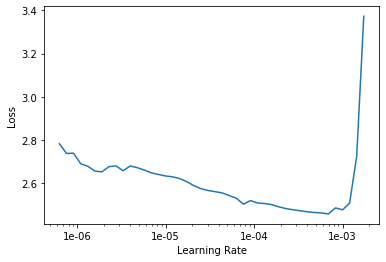

In [20]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


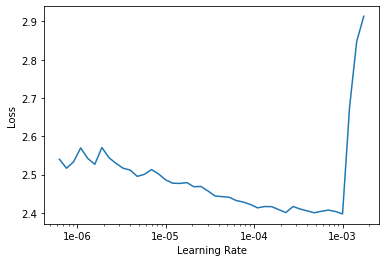

In [16]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


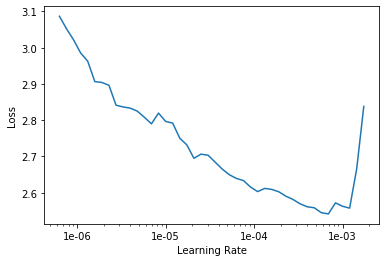

In [27]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(80, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.628786,1.514136,0.494000,11:54
1,1.382402,1.254797,0.584000,11:37
2,1.360343,1.110885,0.630000,10:56
3,1.070578,1.031189,0.648000,11:36


In [ ]:
learn.fit_one_cycle(80, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.627633,1.480883,0.486000,11:53
1,1.413402,1.273026,0.584000,11:39
2,1.230401,0.974959,0.664000,11:38
3,1.098311,0.837432,0.740000,12:18
4,1.009696,0.831372,0.732000,12:01
5,0.980905,0.748413,0.768000,11:50
6,0.929376,0.779336,0.746000,11:37
7,0.847747,0.761982,0.776000,11:55
8,0.783286,0.699105,0.798000,12:40
9,0.732182,0.619258,0.826000,11:35


In [13]:
learn.fit_one_cycle(40, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.567625,1.383984,0.500000,06:46
1,1.384787,1.150492,0.624000,08:50
2,1.245135,1.205579,0.592000,11:44
3,1.060057,0.854266,0.736000,12:28
4,1.008393,0.963847,0.694000,12:08
5,0.982181,0.921926,0.710000,11:47
6,0.830941,0.681312,0.794000,11:39
7,0.792779,0.618973,0.826000,11:30
8,0.696108,0.651449,0.782000,12:17
9,0.721967,0.751259,0.768000,12:17


In [9]:
learn.fit_one_cycle(80, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,6.822800,2.832266,0.282000,06:47
1,1.742962,1.571478,0.480000,12:05
2,1.410026,1.305377,0.548000,11:08
3,1.165003,1.086100,0.646000,11:03
4,1.145900,1.042685,0.660000,11:06
5,1.085535,0.868491,0.726000,11:39
6,1.000167,0.802832,0.744000,11:52
7,0.995444,0.819529,0.728000,11:05
8,0.964281,0.812647,0.732000,11:04
9,0.908025,0.734613,0.774000,11:01


In [32]:
learn.fit_one_cycle(40, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.705432,1.466681,0.498000,11:06
1,1.384203,1.137812,0.626000,11:05
2,1.233516,1.098113,0.650000,11:15
3,1.132939,0.979626,0.694000,12:03
4,1.017847,0.937986,0.696000,11:21
5,0.964262,0.886339,0.724000,11:02
6,0.855907,0.699069,0.772000,11:03
7,0.859793,0.593256,0.814000,10:46
8,0.707385,0.609718,0.802000,06:22
9,1.785787,1.119476,0.628000,06:22


In [28]:
learn.fit_one_cycle(40, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.603857,1.471051,0.506000,17:02
1,1.481879,1.217324,0.614000,15:52
2,1.332132,1.109906,0.632000,17:37
3,1.229106,0.947668,0.686000,12:23
4,1.223797,0.942779,0.712000,11:06
5,0.931772,0.780448,0.754000,11:01
6,0.871370,0.947882,0.700000,10:59
7,0.865839,0.651976,0.802000,11:44
8,0.703516,0.570404,0.816000,11:42
9,0.651289,0.617071,0.798000,10:55


In [24]:
learn.fit_one_cycle(40, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.738970,1.585842,0.466000,05:48
1,1.469727,1.313485,0.538000,05:44
2,1.311915,1.215591,0.602000,05:43
3,1.146827,0.886743,0.742000,05:43
4,0.988290,0.761713,0.766000,05:43
5,0.897409,0.820403,0.782000,05:43
6,0.968036,0.730355,0.780000,05:44
7,0.786422,0.805657,0.722000,05:44
8,0.823733,0.635033,0.802000,05:43
9,0.695726,0.578717,0.818000,05:43


In [20]:
learn.fit_one_cycle(40, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.548724,1.425547,0.510000,08:53
1,1.420358,1.068688,0.648000,08:53
2,1.310424,1.095769,0.642000,08:53
3,1.127553,0.915621,0.710000,08:53
4,1.003391,0.735115,0.764000,08:51
5,0.935600,0.667365,0.776000,08:51
6,0.859093,0.699566,0.790000,08:51
7,0.803943,0.592106,0.820000,08:50
8,0.850388,0.775101,0.762000,08:49
9,0.727334,0.888698,0.790000,08:50


In [16]:
learn.fit_one_cycle(40, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.731939,1.548311,0.464000,05:26
1,1.561000,1.430755,0.534000,05:24
2,1.336362,1.176057,0.606000,05:24
3,1.156303,0.962256,0.694000,05:23
4,1.090212,0.893706,0.726000,05:23
5,0.878570,0.905291,0.726000,05:22
6,0.849781,0.852651,0.734000,05:22
7,0.729649,0.849836,0.726000,05:22
8,0.782399,0.531916,0.828000,05:21
9,0.664523,0.602663,0.806000,05:21


In [12]:
learn.fit_one_cycle(40, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.708597,1.610307,0.462000,09:17
1,1.549860,1.254722,0.574000,09:47
2,1.310015,1.148387,0.630000,09:34
3,1.202057,0.895104,0.712000,09:49
4,1.060858,0.931922,0.728000,09:51
5,0.908153,0.781517,0.758000,09:49
6,0.847829,0.743881,0.756000,09:48
7,0.735129,0.631547,0.818000,09:32
8,0.785791,0.581202,0.822000,09:45
9,0.715311,0.542977,0.818000,09:48


In [8]:
learn.fit_one_cycle(40, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.787616,1.618141,0.416000,07:39
1,1.517467,1.435422,0.542000,07:37
2,1.320251,1.112076,0.646000,07:33
3,1.249637,1.212734,0.582000,07:31
4,0.974822,0.868149,0.716000,07:32
5,1.038159,0.727292,0.780000,07:30
6,0.854428,0.727492,0.766000,07:36
7,0.824981,0.796043,0.748000,07:42
8,0.699296,0.653243,0.818000,07:42
9,0.666284,0.533777,0.832000,07:44


In [8]:
learn.fit_one_cycle(20, 1e-4, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,2.102118,1.848209,0.334000,14:10
1,1.659859,1.539307,0.470000,13:09
2,1.530309,1.234192,0.564000,10:55
3,1.251934,1.109946,0.634000,09:44
4,1.066587,0.854617,0.716000,12:10
5,0.976736,0.834525,0.758000,14:08
6,0.894122,0.744615,0.786000,14:15
7,0.824240,0.806127,0.746000,13:35
8,0.725339,0.619456,0.816000,13:47
9,0.653659,0.575597,0.818000,14:16


In [11]:
learn.fit_one_cycle(20, 1e-6, wd=0)

epoch,train_loss,valid_loss,accuracy,time
0,0.238923,0.351745,0.904000,11:02
1,0.247019,0.350751,0.906000,11:07
2,0.256812,0.351806,0.904000,10:45
3,0.213136,0.352694,0.904000,10:23
4,0.237389,0.356446,0.904000,08:42
5,0.215721,0.354782,0.902000,10:19
6,0.215518,0.354244,0.902000,07:49
7,0.237711,0.356276,0.898000,07:50
8,0.210591,0.351878,0.904000,07:21
9,0.198808,0.352407,0.906000,07:14


In [34]:
learn.save('stage-1')

In [8]:
learn.load('stage-1')

RuntimeError: Error(s) in loading state_dict for mixedNet:
	size mismatch for conv011.weight: copying a param with shape torch.Size([32, 32, 4, 4]) from checkpoint, the shape in current model is torch.Size([32, 32, 3, 3]).
	size mismatch for conv012.weight: copying a param with shape torch.Size([32, 32, 4, 4]) from checkpoint, the shape in current model is torch.Size([32, 32, 3, 3]).
	size mismatch for conv013.weight: copying a param with shape torch.Size([32, 32, 4, 4]) from checkpoint, the shape in current model is torch.Size([32, 32, 3, 3]).
	size mismatch for conv014.weight: copying a param with shape torch.Size([32, 32, 4, 4]) from checkpoint, the shape in current model is torch.Size([32, 32, 3, 3]).
	size mismatch for conv015.weight: copying a param with shape torch.Size([32, 32, 4, 4]) from checkpoint, the shape in current model is torch.Size([32, 32, 3, 3]).
	size mismatch for conv016.weight: copying a param with shape torch.Size([32, 32, 4, 4]) from checkpoint, the shape in current model is torch.Size([32, 32, 3, 3]).
	size mismatch for conv311.weight: copying a param with shape torch.Size([224, 224, 4, 4]) from checkpoint, the shape in current model is torch.Size([224, 224, 5, 5]).
	size mismatch for conv312.weight: copying a param with shape torch.Size([224, 224, 4, 4]) from checkpoint, the shape in current model is torch.Size([224, 224, 5, 5]).
	size mismatch for conv313.weight: copying a param with shape torch.Size([224, 224, 4, 4]) from checkpoint, the shape in current model is torch.Size([224, 224, 5, 5]).
	size mismatch for conv314.weight: copying a param with shape torch.Size([224, 224, 4, 4]) from checkpoint, the shape in current model is torch.Size([224, 224, 5, 5]).
	size mismatch for conv315.weight: copying a param with shape torch.Size([224, 224, 4, 4]) from checkpoint, the shape in current model is torch.Size([224, 224, 5, 5]).
	size mismatch for conv316.weight: copying a param with shape torch.Size([224, 224, 4, 4]) from checkpoint, the shape in current model is torch.Size([224, 224, 5, 5]).
	size mismatch for conv32.weight: copying a param with shape torch.Size([384, 224, 4, 4]) from checkpoint, the shape in current model is torch.Size([384, 224, 5, 5]).
	size mismatch for conv411.weight: copying a param with shape torch.Size([384, 384, 4, 4]) from checkpoint, the shape in current model is torch.Size([384, 384, 5, 5]).
	size mismatch for conv412.weight: copying a param with shape torch.Size([384, 384, 4, 4]) from checkpoint, the shape in current model is torch.Size([384, 384, 5, 5]).
	size mismatch for conv413.weight: copying a param with shape torch.Size([384, 384, 4, 4]) from checkpoint, the shape in current model is torch.Size([384, 384, 5, 5]).
	size mismatch for conv414.weight: copying a param with shape torch.Size([384, 384, 4, 4]) from checkpoint, the shape in current model is torch.Size([384, 384, 5, 5]).
	size mismatch for conv415.weight: copying a param with shape torch.Size([384, 384, 4, 4]) from checkpoint, the shape in current model is torch.Size([384, 384, 5, 5]).
	size mismatch for conv416.weight: copying a param with shape torch.Size([384, 384, 4, 4]) from checkpoint, the shape in current model is torch.Size([384, 384, 5, 5]).

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

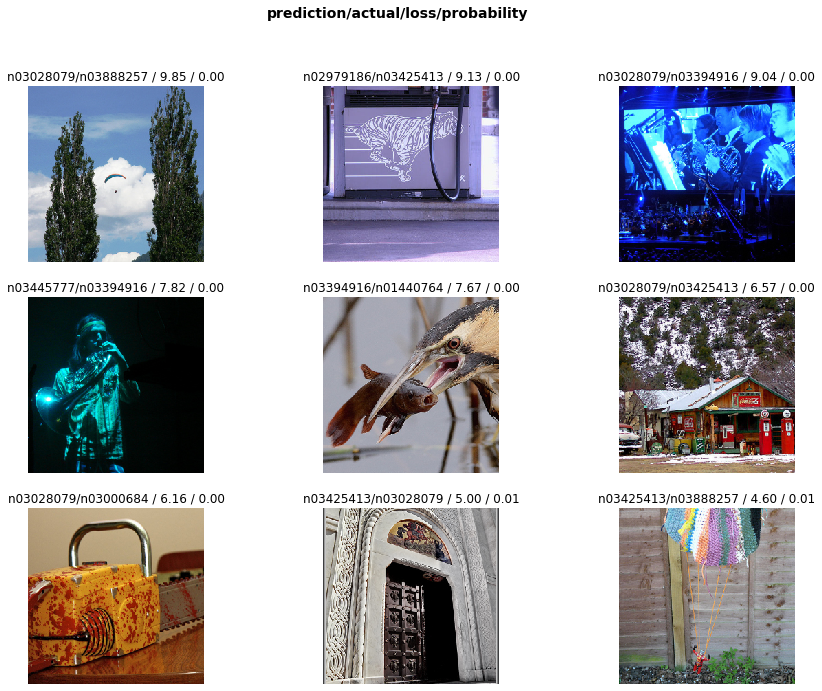

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

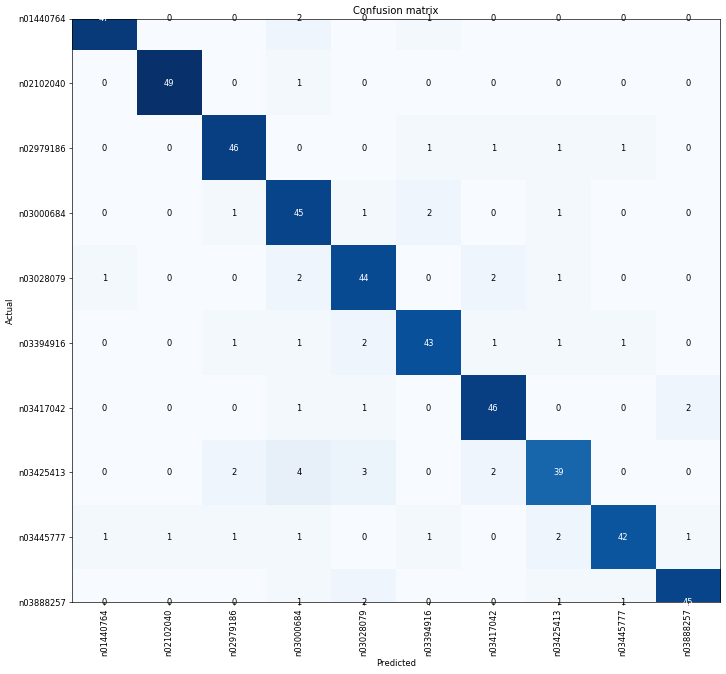

In [12]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [24]:
open_image(data.items[25]).data

tensor([[[0.9098, 1.0000, 0.9255,  ..., 0.1569, 0.0784, 0.0039],
         [0.7176, 0.7137, 1.0000,  ..., 0.2588, 0.2275, 0.1529],
         [0.4235, 0.6706, 0.9098,  ..., 0.1922, 0.1451, 0.1529],
         ...,
         [0.6902, 0.7725, 0.6314,  ..., 0.0549, 0.0745, 0.1020],
         [0.5686, 0.3961, 0.8196,  ..., 0.0706, 0.0980, 0.1333],
         [0.8039, 0.5059, 0.5412,  ..., 0.0941, 0.1137, 0.1725]],

        [[0.9137, 1.0000, 0.9333,  ..., 0.2000, 0.1176, 0.0431],
         [0.7333, 0.7294, 1.0000,  ..., 0.3020, 0.2706, 0.1922],
         [0.4549, 0.7020, 0.9451,  ..., 0.2353, 0.1882, 0.1922],
         ...,
         [0.8196, 0.8980, 0.7294,  ..., 0.0745, 0.0941, 0.1216],
         [0.6980, 0.5098, 0.9176,  ..., 0.0706, 0.0980, 0.1333],
         [0.9176, 0.6039, 0.6196,  ..., 0.0902, 0.1098, 0.1686]],

        [[0.7490, 0.8471, 0.7373,  ..., 0.0824, 0.0118, 0.0000],
         [0.6039, 0.5843, 0.8627,  ..., 0.1765, 0.1529, 0.0941],
         [0.3725, 0.6078, 0.8235,  ..., 0.1098, 0.0706, 0.

In [5]:
data[0]

TypeError: 'ImageDataBunch' object is not subscriptable

In [7]:
open_image(data.items[10]).data

tensor([[[0.1333, 0.1569, 0.1137,  ..., 0.5020, 0.4784, 0.4510],
         [0.1216, 0.1647, 0.1333,  ..., 0.4314, 0.4118, 0.3922],
         [0.0902, 0.1490, 0.1294,  ..., 0.3137, 0.3098, 0.3020],
         ...,
         [0.1882, 0.2863, 0.2549,  ..., 0.2549, 0.2588, 0.2588],
         [0.1843, 0.2510, 0.2549,  ..., 0.2471, 0.2627, 0.2784],
         [0.1686, 0.2392, 0.2431,  ..., 0.2510, 0.2667, 0.2824]],

        [[0.1569, 0.2000, 0.1804,  ..., 0.5490, 0.5255, 0.4980],
         [0.1686, 0.2275, 0.2157,  ..., 0.4902, 0.4706, 0.4510],
         [0.1686, 0.2471, 0.2431,  ..., 0.3882, 0.3843, 0.3765],
         ...,
         [0.1882, 0.2863, 0.2549,  ..., 0.3020, 0.3059, 0.3059],
         [0.1922, 0.2588, 0.2627,  ..., 0.2902, 0.3059, 0.3216],
         [0.1765, 0.2471, 0.2510,  ..., 0.2941, 0.3098, 0.3255]],

        [[0.1490, 0.1843, 0.1569,  ..., 0.6510, 0.6275, 0.6000],
         [0.1608, 0.2157, 0.1961,  ..., 0.6039, 0.5843, 0.5647],
         [0.1647, 0.2353, 0.2275,  ..., 0.5059, 0.5020, 0.